In [97]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = "{:.2f}".format 


In [2]:

df = pd.read_csv("../datos/bikes_eda.csv", index_col=0)
#Eliminamos columnas según la matriz de correlación
df=df.drop(['temp','mnth'],axis=1)
df.head()


,instant,dteday,season,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
0,1,2018-01-01,winter,0,1,1,2,18.18125,80.5833,10.749882,985
1,2,2018-01-02,winter,0,0,2,2,17.68695,69.6087,16.652113,801
2,3,2018-01-03,winter,0,0,3,1,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,winter,0,0,4,1,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,winter,0,0,5,1,11.46350,43.6957,12.522300,1600


En vista de que estos datos tienen en cuenta condiciones climatológicas, festivos y estaciones diferentes del año decidimos que vamos a analizar los datos, dividiendolos en 4, según la estación del año. De esta manera, planteamos la siguiente hipótesis con la variable respuesta:
 - Hipótesis: Cuántas bicis voy a necesitar por estación, de acuerdo al clima y días festivos contenga.
 - H0: Nuestras variables predictoras no afectan a nuestra variable respuesta.
 - H1: Nuestras variables predictoras si afectan a nuestra variable respuesta.
 - V. respuesta: columna cnt ()


>Otoño

In [3]:
#creamos un dataframe con los datos de otoño
otoño= df[df['season'] == 'autumn']
otoño.head()

,instant,dteday,season,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
265,266,2018-09-23,autumn,0,0,7,2,26.10625,97.2500,5.250569,2395
266,267,2018-09-24,autumn,0,0,1,2,28.22060,86.2500,5.251681,5423
267,268,2018-09-25,autumn,0,0,2,2,28.63185,84.5000,3.375406,5010
268,269,2018-09-26,autumn,0,0,3,2,29.45210,84.8333,7.416900,4630
269,270,2018-09-27,autumn,0,0,4,2,28.72625,88.5417,7.917457,4120


In [4]:
otoño.reset_index(drop= True, inplace= True)

EDA

In [5]:
otoño.shape

(178, 11)

In [6]:
otoño.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     178 non-null    int64  
 1   dteday      178 non-null    object 
 2   season      178 non-null    object 
 3   yr          178 non-null    int64  
 4   holiday     178 non-null    int64  
 5   weekday     178 non-null    int64  
 6   weathersit  178 non-null    int64  
 7   atemp       178 non-null    float64
 8   hum         178 non-null    float64
 9   windspeed   178 non-null    float64
 10  cnt         178 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 15.4+ KB


In [7]:
# duplicados 

otoño.duplicated().sum()

0

In [8]:
otoño.isnull().sum()

instant       0
dteday        0
season        0
yr            0
holiday       0
weekday       0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [9]:
otoño.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,178.0,492.500000,184.819235,266.000000,310.250000,492.500000,674.750000,719.000000
yr,178.0,0.500000,0.501410,0.000000,0.000000,0.500000,1.000000,1.000000
holiday,178.0,0.033708,0.180985,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,178.0,3.983146,1.995687,1.000000,2.000000,4.000000,6.000000,7.000000
weathersit,178.0,1.477528,0.603240,1.000000,1.000000,1.000000,2.000000,3.000000
atemp,178.0,20.776937,4.776784,11.395650,16.895000,20.469675,25.157550,30.398750
hum,178.0,66.871917,13.124796,33.347800,57.072925,66.104200,75.687525,97.250000
windspeed,178.0,11.523637,5.464839,1.500244,7.125450,11.188028,15.249870,28.292425
cnt,178.0,4728.162921,1699.615261,22.000000,3615.500000,4634.500000,5624.500000,8555.000000


In [10]:
# principales estadisticos de las variables categóricas

categoricas= otoño.describe(include ="object").T
categoricas.head(2)

,count,unique,top,freq
dteday,178,178,2018-09-23,1
season,178,1,autumn,178


In [11]:
#variables numericas
numericas = df.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,instant,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,2,0,0,2,2,17.68695,69.6087,16.652113,801


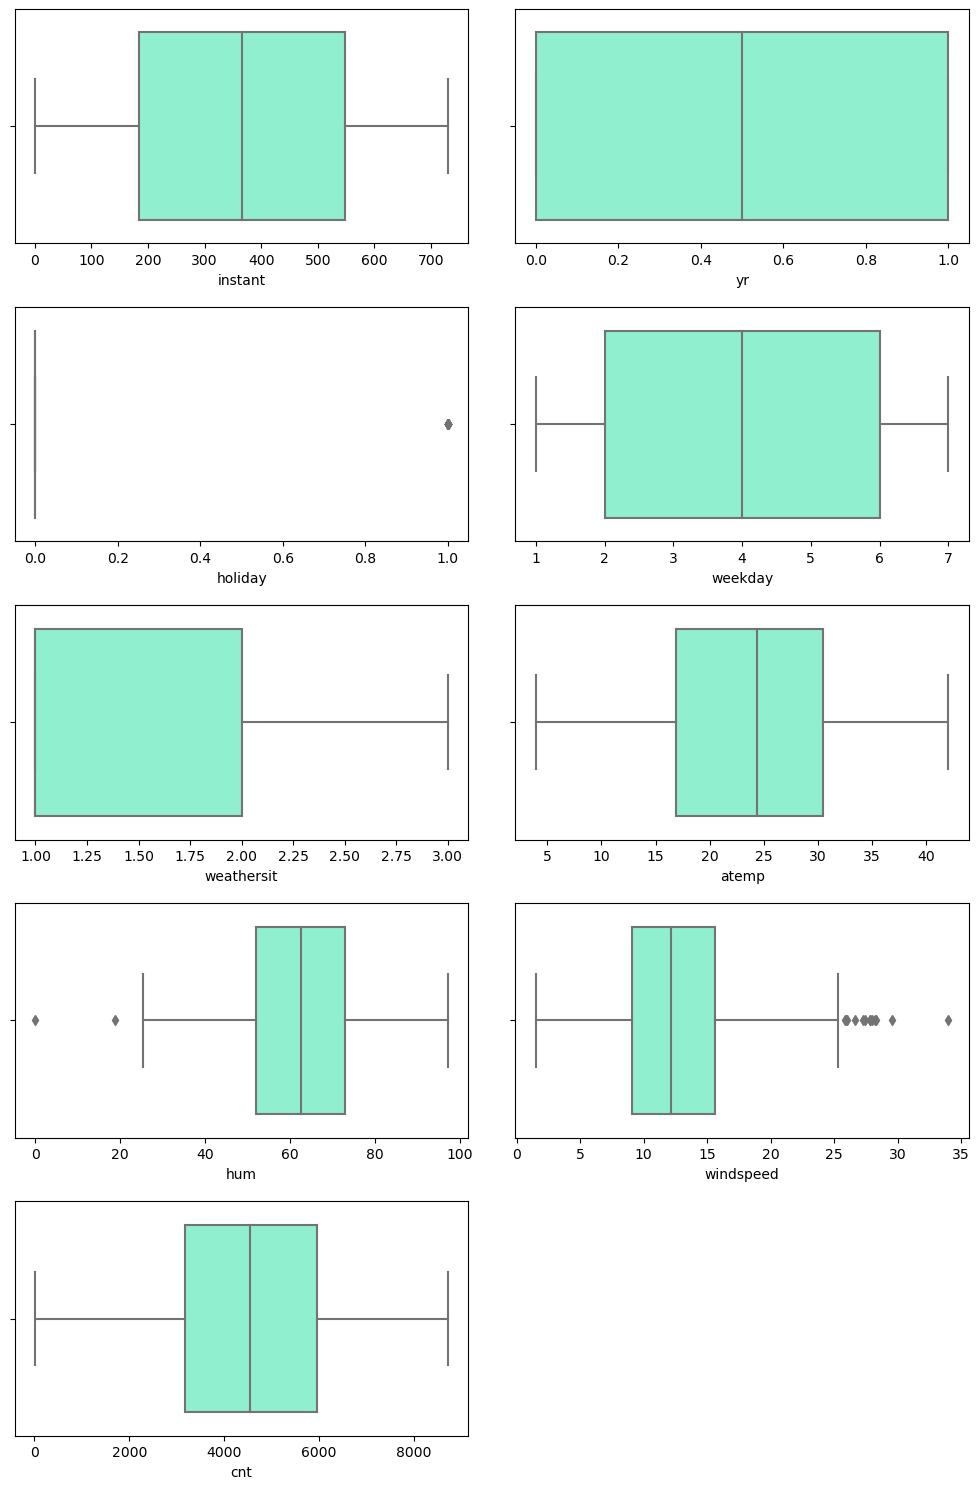

In [12]:
# boxplot para variables numericas (outliers)
fig, axes = plt.subplots(5, 2, figsize=(10,15))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = otoño, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])


plt.show()

Vamos a ver los outliers

In [13]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) |(dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    
    return dicc_indices

In [14]:
outliers_indice = detectar_outliers(numericas, otoño)
outliers_indice

{'holiday': [15, 50, 60, 110, 138, 155], 'windspeed': [27], 'cnt': [125]}

In [15]:
otoño.loc[outliers_indice['holiday']]

,instant,dteday,season,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
15,281,2018-10-08,autumn,0,1,1,1,25.66210,70.1250,3.042081,5409
50,316,2018-11-12,autumn,0,1,1,1,17.89710,55.2917,14.208154,4067
60,326,2018-11-22,autumn,0,1,4,3,21.08480,96.2500,7.959064,1607
110,652,2019-10-14,autumn,1,1,2,1,25.41020,64.0417,18.667004,6639
138,680,2019-11-11,autumn,1,1,2,1,21.08565,65.9167,8.542500,6852
155,697,2019-11-28,autumn,1,1,5,1,14.48810,50.6250,14.125007,5260


In [16]:
otoño.loc[outliers_indice['windspeed']]

,instant,dteday,season,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
27,293,2018-10-20,autumn,0,0,6,1,23.32625,63.625,28.292425,4195


In [17]:
otoño.loc[outliers_indice['cnt']]

,instant,dteday,season,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
125,667,2019-10-29,autumn,1,0,3,3,21.97,88.0,23.9994,22


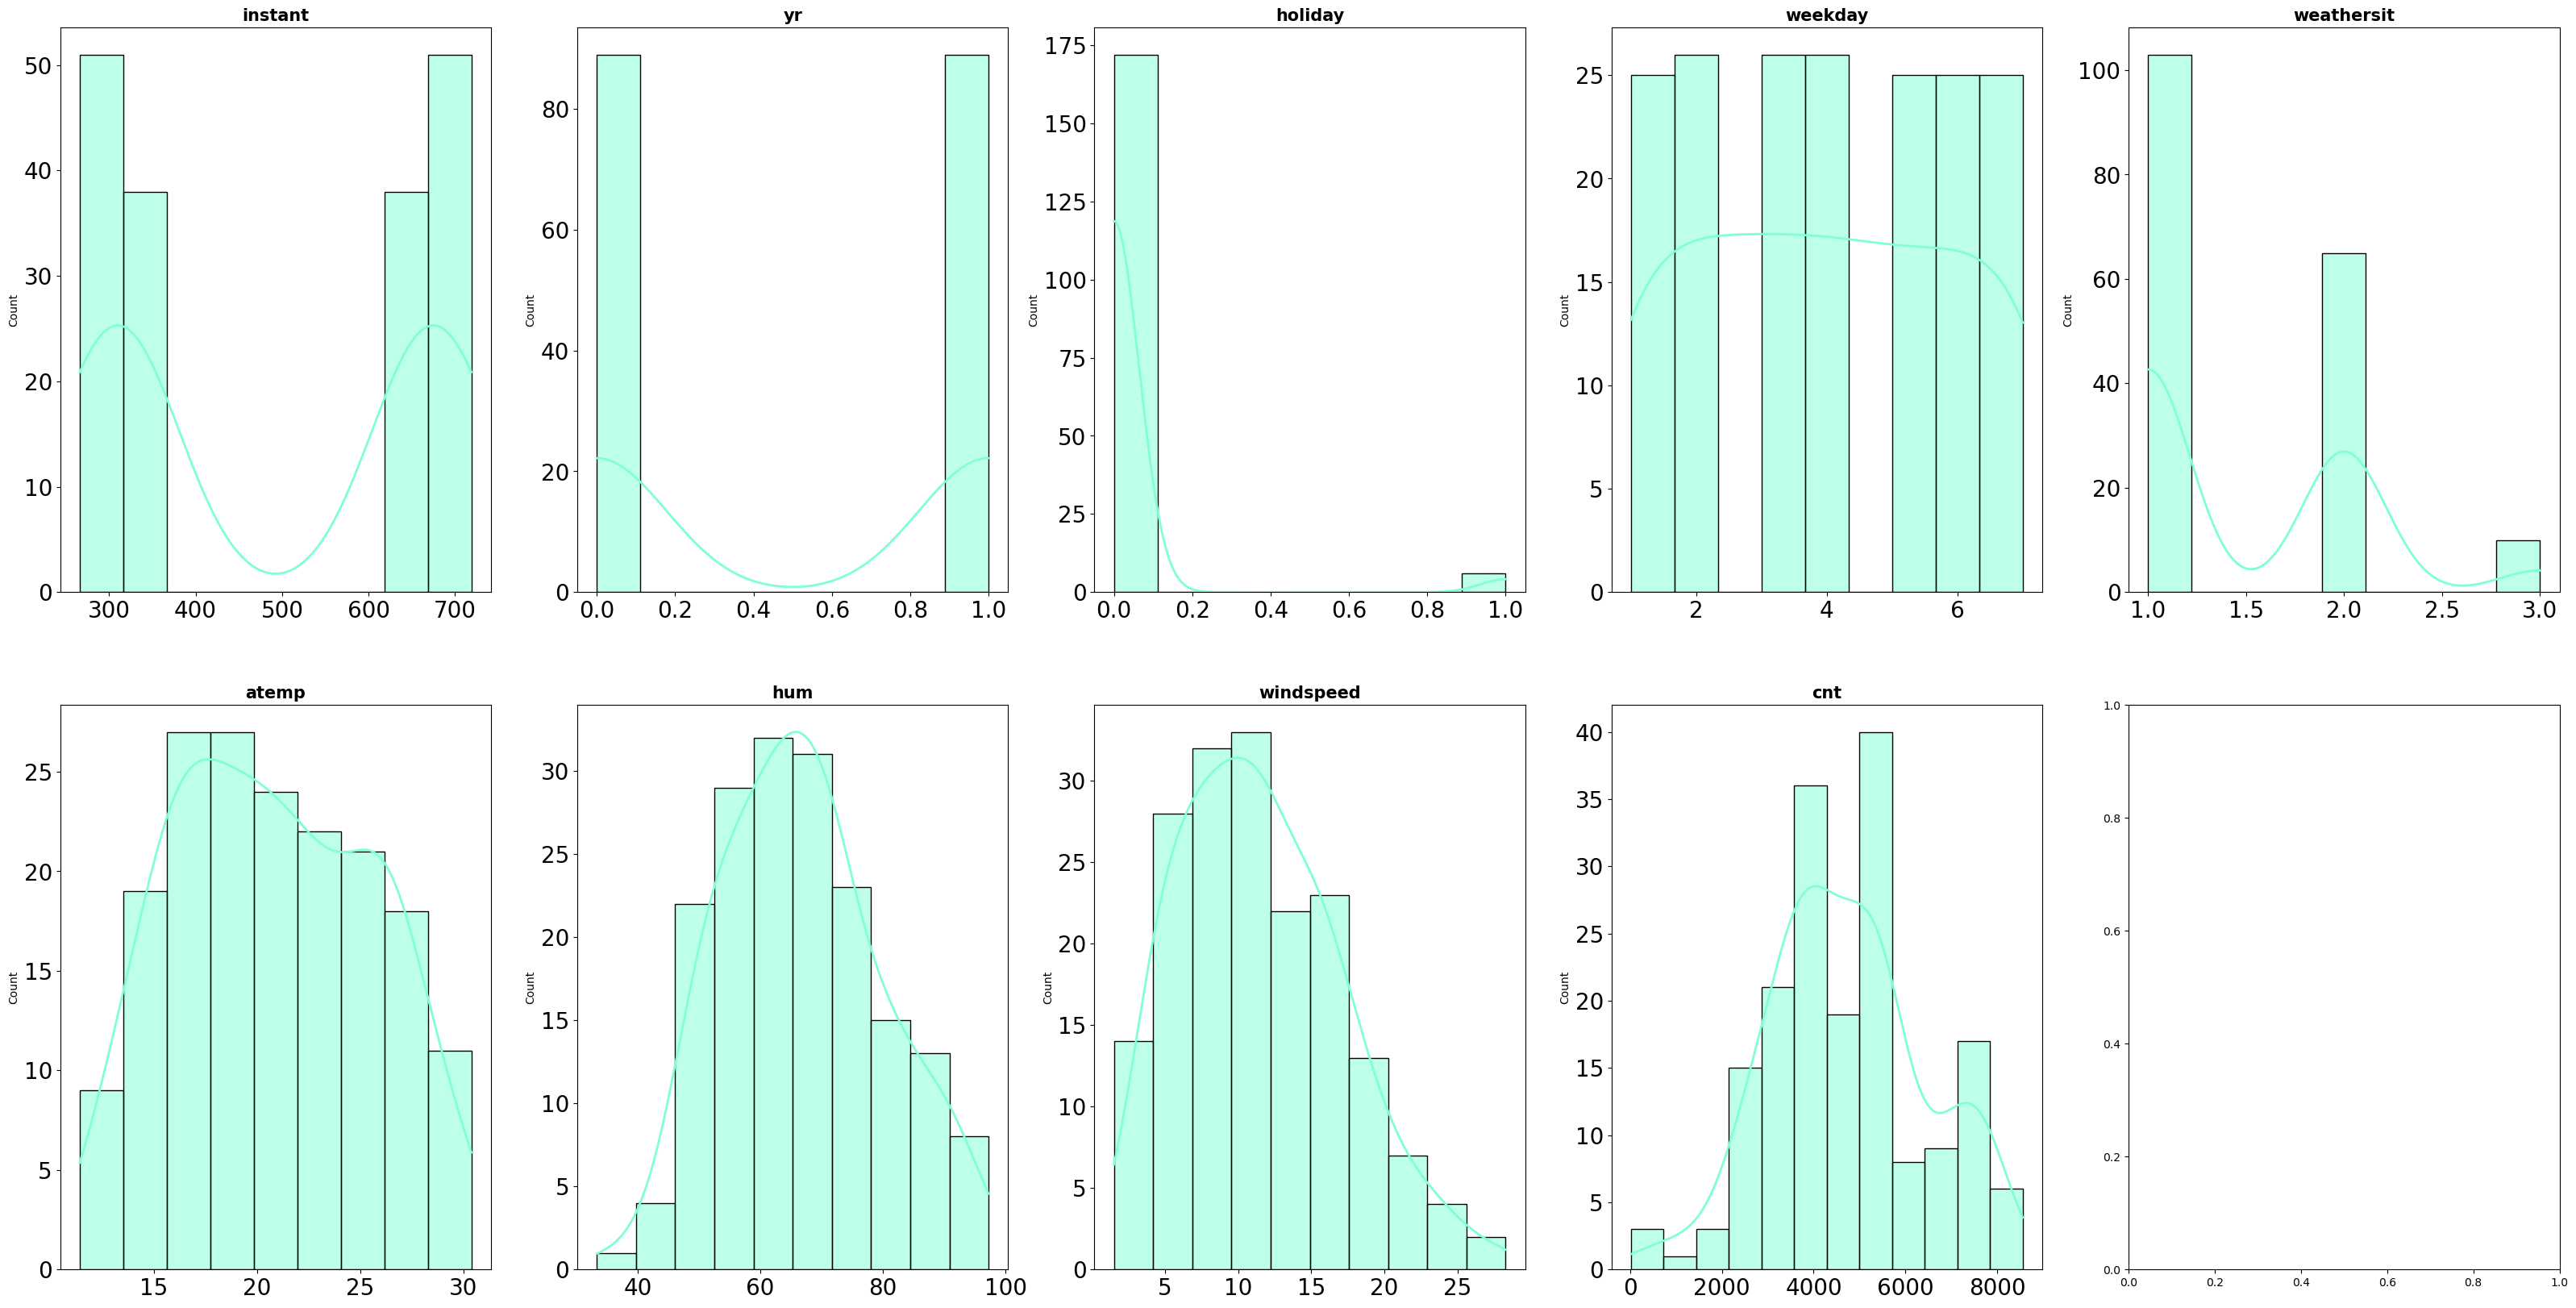

In [18]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (40, 20))


axes = axes.flat

columnas_numeric = otoño.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = otoño,
        x = colum,
        kde = True, 
        color = "aquamarine", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

 

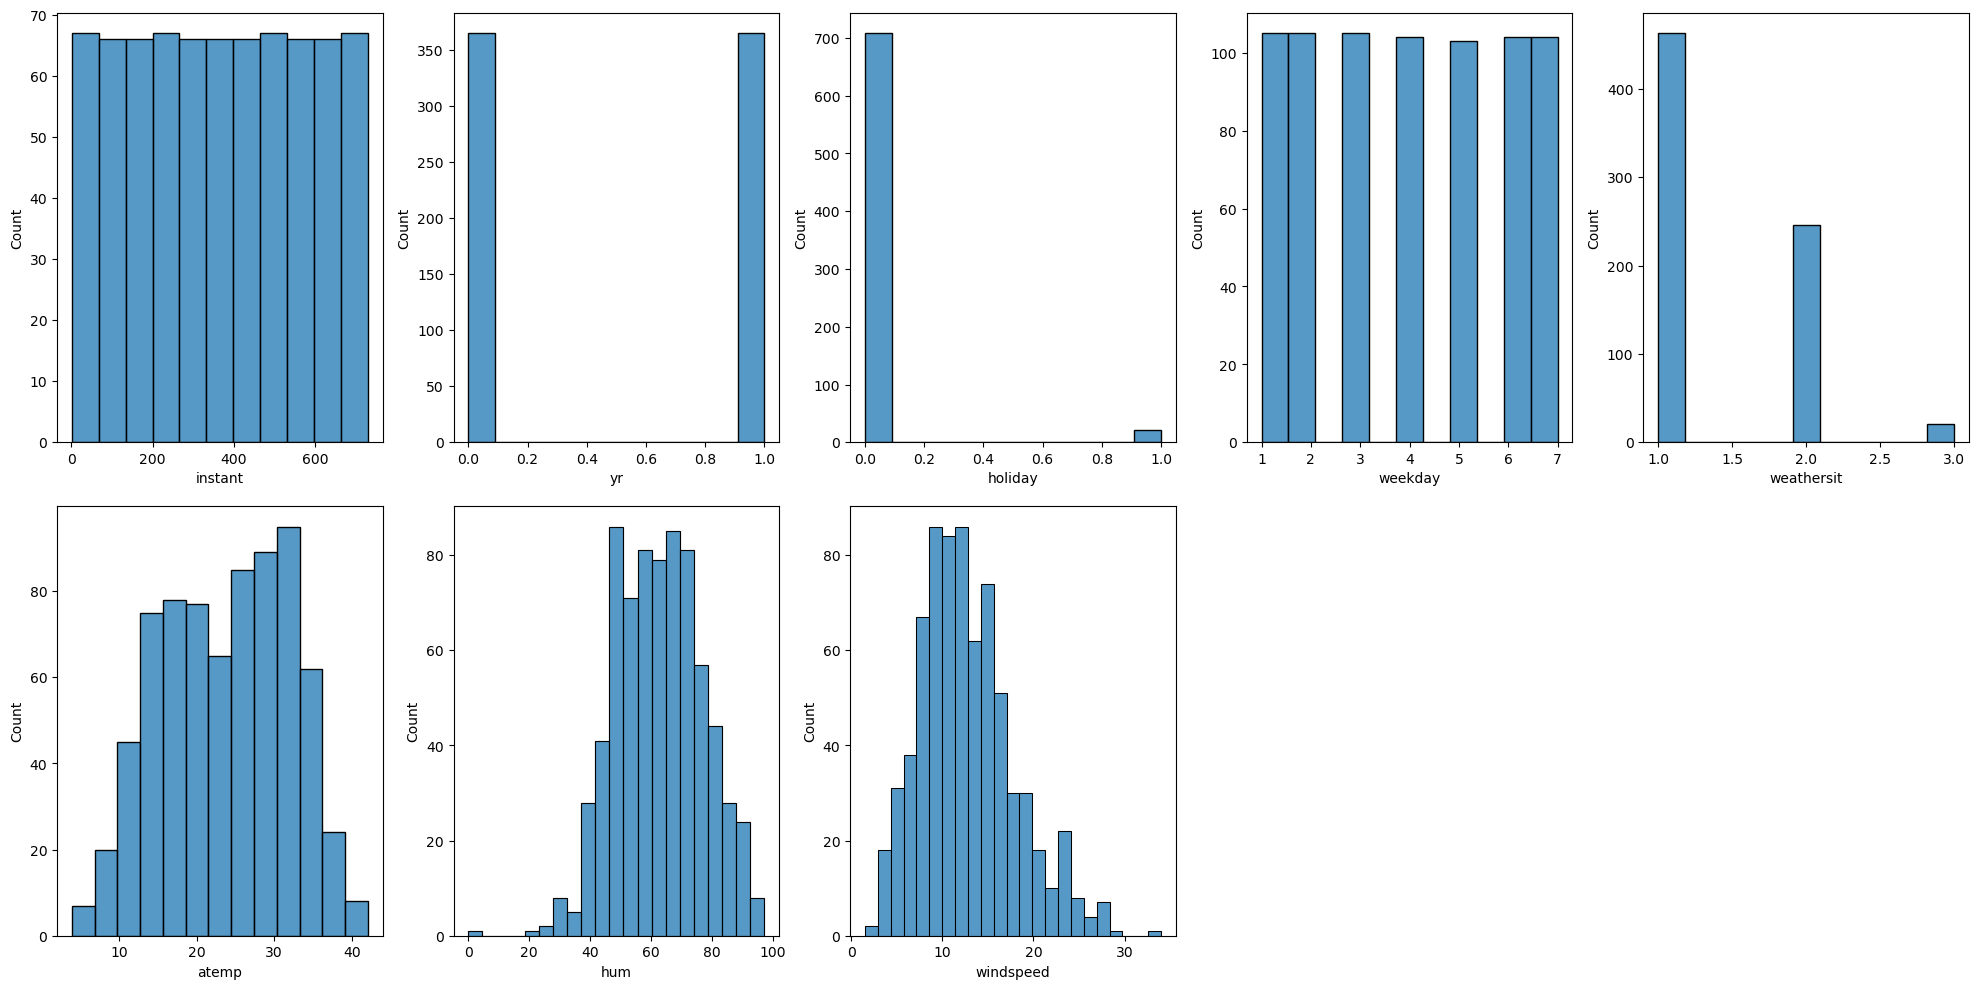

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(20,10))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.histplot(x = numericas[columna], data = otoño, ax=axes[indice]); # para trazar una línea de densidad
   
plt.tight_layout()
fig.delaxes(axes[-1])
fig.delaxes(axes[-2])

plt.show()

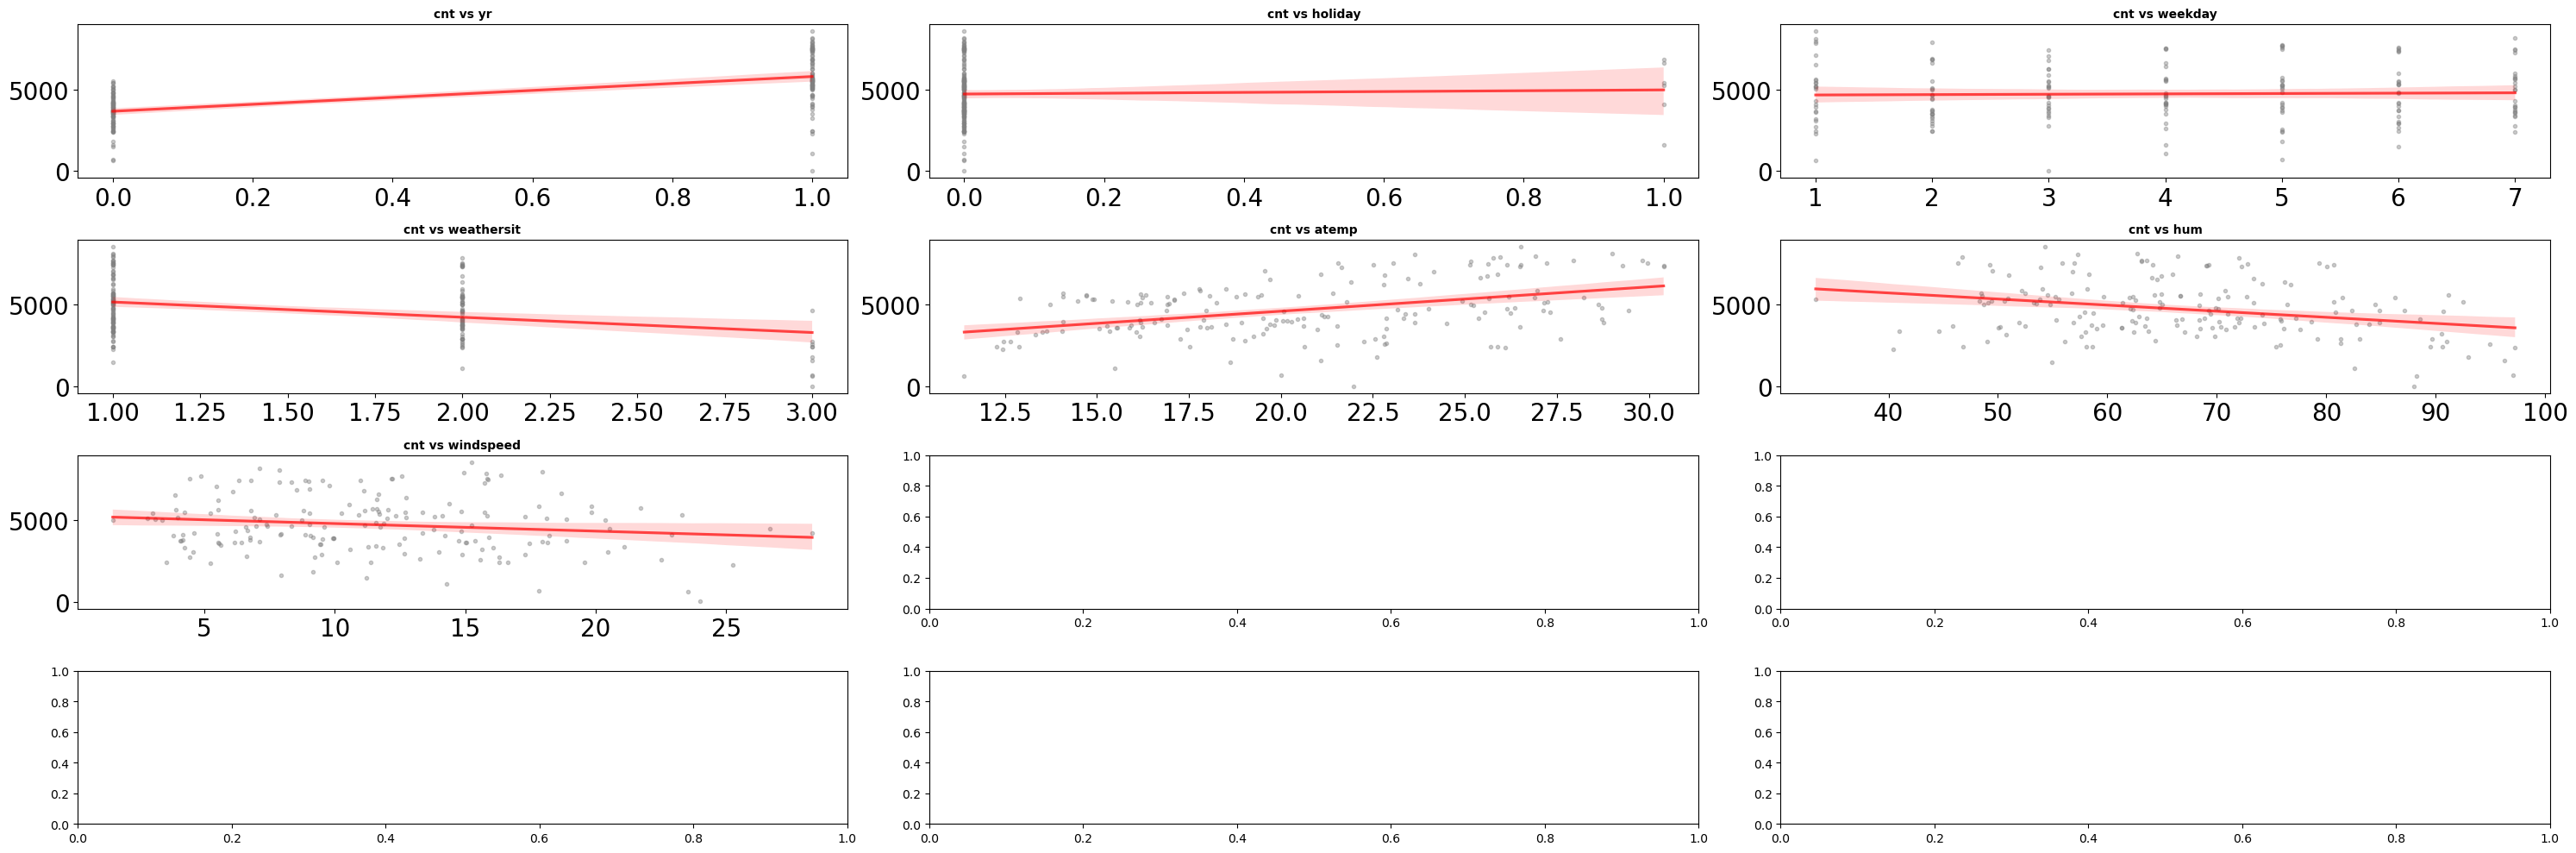

In [20]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = otoño.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["cnt",'instant'])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = otoño[colum], 
        y = otoño["cnt"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"cnt vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()

- vemos que con respeto al 2018, en 2019 se han alquilado mas bicis, es una tendencia clara.
- dependiendo del mes se alquilan mas o menos bicis( en el mes de diciembre hay una bajada en la tendencia)
- Vemos que no nos afecta las vacaciones, el dia de trabajo, y tampoco el dia de la semana, estas variables se mantienen constantes
- vemos que lo que mas alquilan bicicletas es la gente registrada
- a mayor temperatura mas bicis se alquilan

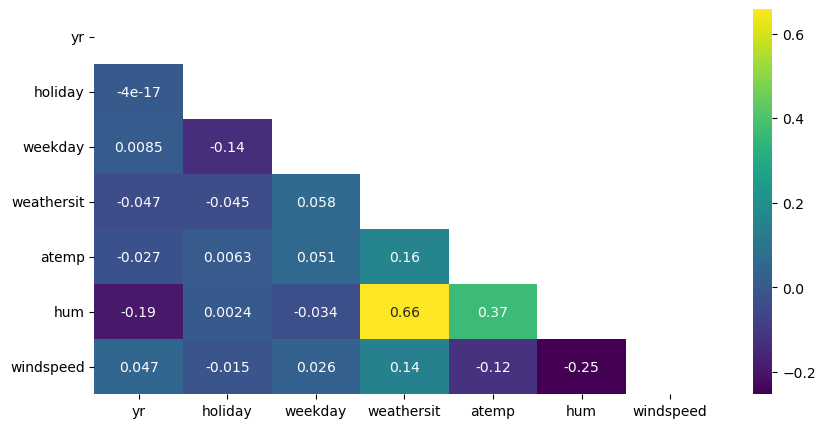

In [21]:
# Hacemos un heatmap con las variables numéricas contínuas
numeric = (otoño.select_dtypes(include = np.number)).drop(['cnt','instant'], axis=1)
correlacion = numeric.corr()
plt.figure(figsize=(10,5))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, cmap="viridis", annot = True, mask = mask); #barra lateral

In [22]:
#Eliminamos columnas para otoño según las variables que tienen una correlación fuerte.
    #workingday, temp, month

Para hacer una regresion lineal tiene que haber por lo menos una correlacion moderada, asi que nos vamos a fijar en las correlaciones que superan el 0.70 , tanto ascendente como descendente.

Correlaciones ascendentes positivas fuertes : más de 0,70

- entre `temperatura` y `sensacion termica`, a mayor temperatura , mayor sensacion termica

Correlaciones ascendetes moderadas( 0,50- 0,70)
- entre `humedad` y `weathershit` :a mayor dia nu8blado , mas humedad
- entre `año` y gente `registrada`: parece que con los años mas gente registrada hay
  
Correlaciones ascendentes negativas fuertes : más de 0,70
- entre `temperatura` y `mes`:  en los meses de otoño la temperatura baja
- entre `mes` y `sensacion termica`: a mayor mes menos sensacion termica
- vemos claramente que hay una correlacion perfecta negativa entre `workingday` y `holiday`, y efectivamente es asi, cuando el dia de trabajo es 1 el workingday disminuye(en nuestro caso 0)


 ## Normalización

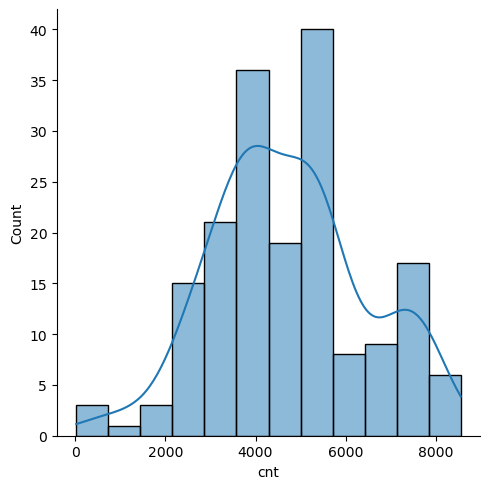

In [23]:
sns.displot(otoño['cnt'], kde=True)  #Nuestra variable respuesta no sigue una distribución normal, por lo que vamos a normalizar sus datos.
plt.show();

Manualmente

In [24]:
media=otoño['cnt'].mean()
max=otoño['cnt'].max()
min=otoño['cnt'].min()

In [25]:
otoño['cnt_NORM']=(otoño['cnt']-media)/(max-min)

/tmp/ipykernel_1679/2460004844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otoño['cnt_NORM']=(otoño['cnt']-media)/(max-min)


/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


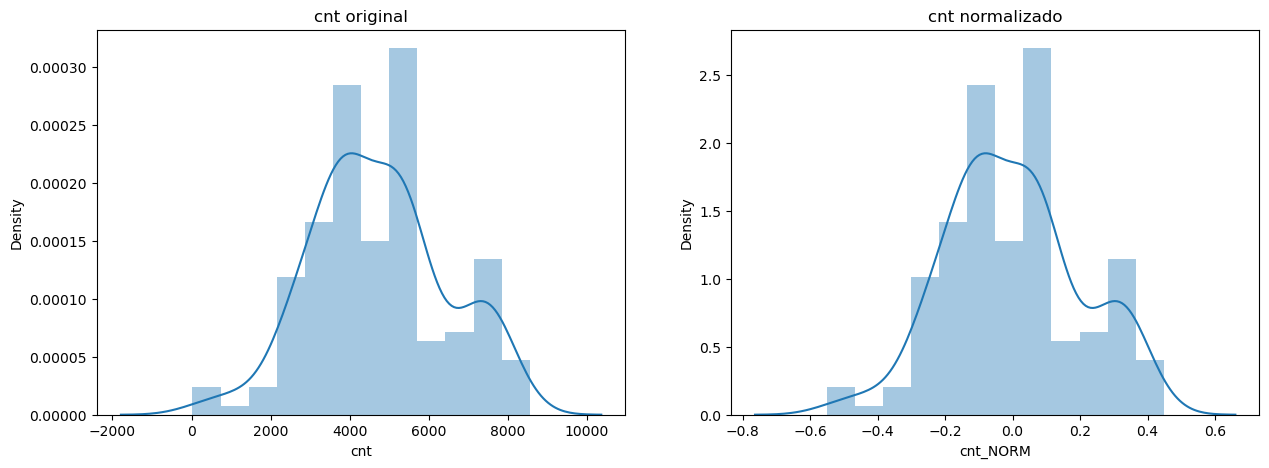

In [26]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('cnt original')
axes[1].set_title('cnt normalizado')

sns.distplot(otoño['cnt'] ,ax = axes[0])
sns.distplot(otoño["cnt_NORM"], ax = axes[1])
plt.show();

In [27]:
stats.shapiro(otoño["cnt_NORM"])

ShapiroResult(statistic=0.9814850687980652, pvalue=0.018196173012256622)

Logaritmo

In [28]:
otoño["cnt_LOG"] = otoño["cnt"].apply(lambda x: np.log(x) if x > 0 else 0)

/tmp/ipykernel_1679/3107362080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otoño["cnt_LOG"] = otoño["cnt"].apply(lambda x: np.log(x) if x > 0 else 0)


/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


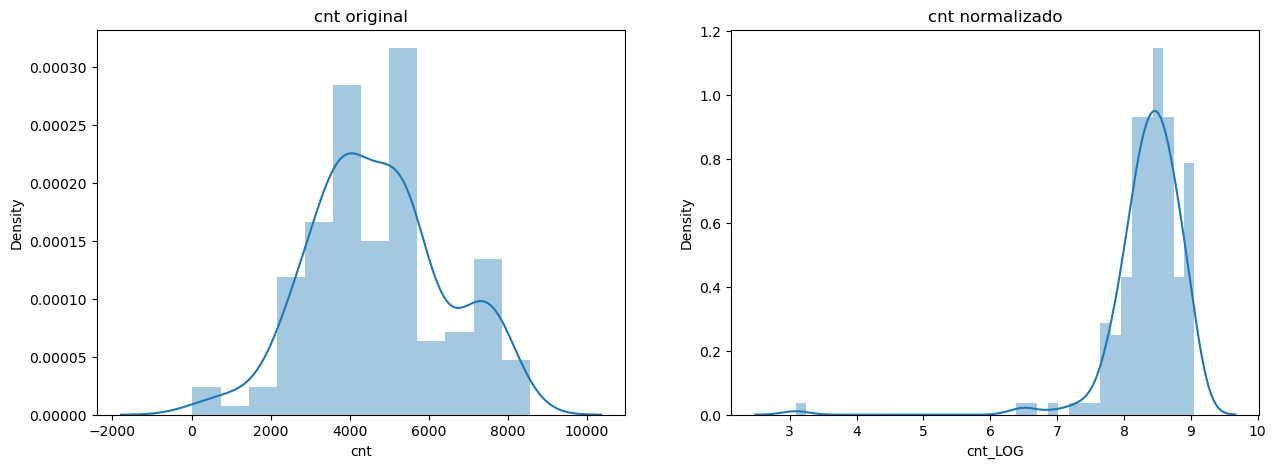

In [29]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('cnt original')
axes[1].set_title('cnt normalizado')

sns.distplot(otoño['cnt'] ,ax = axes[0])
sns.distplot(otoño["cnt_LOG"], ax = axes[1])
plt.show();

In [30]:
stats.shapiro(otoño["cnt_LOG"])

ShapiroResult(statistic=0.6671236753463745, pvalue=1.6478055085588429e-18)

Raiz cuadrada

In [31]:
otoño["cnt_RAIZ"] = otoño["cnt"].apply(lambda x: math.sqrt(x))

/tmp/ipykernel_1679/1511623282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otoño["cnt_RAIZ"] = otoño["cnt"].apply(lambda x: math.sqrt(x))


/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


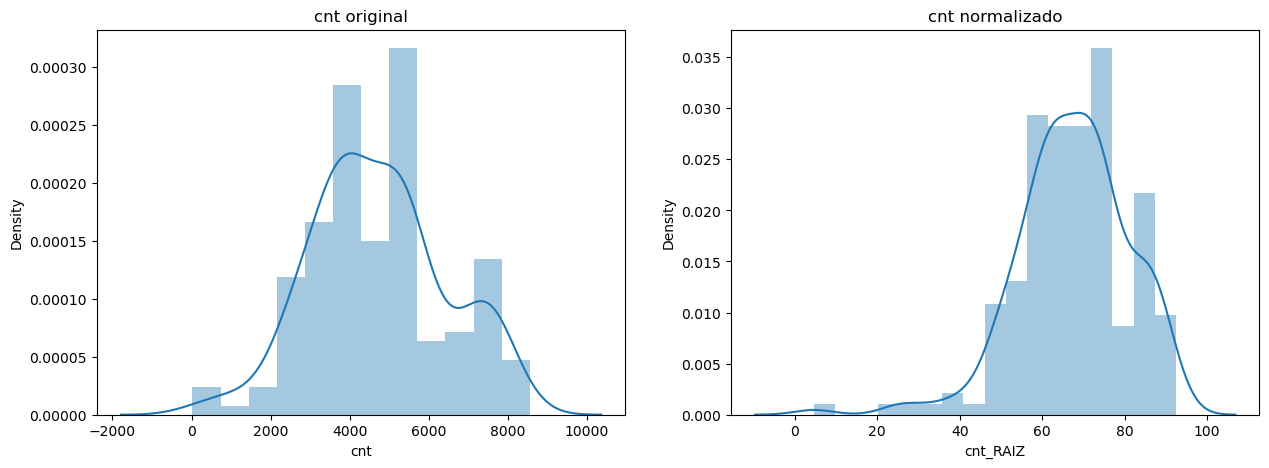

In [32]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('cnt original')
axes[1].set_title('cnt normalizado')

sns.distplot(otoño['cnt'] ,ax = axes[0])
sns.distplot(otoño["cnt_RAIZ"], ax = axes[1])
plt.show();

In [33]:
stats.shapiro(otoño["cnt_RAIZ"])

ShapiroResult(statistic=0.9518401622772217, pvalue=9.386631063534878e-06)

In [34]:
otoño.head(2)

,instant,dteday,season,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt,cnt_NORM,cnt_LOG,cnt_RAIZ
0,266,2018-09-23,autumn,0,0,7,2,26.10625,97.25,5.250569,2395,-0.273428,7.781139,48.938737
1,267,2018-09-24,autumn,0,0,1,2,28.22060,86.25,5.251681,5423,0.081429,8.598404,73.641021


Boxcox

In [35]:
otoño['cnt_BOX'], lambda_ajustada = stats.boxcox(otoño['cnt'])
lambda_ajustada

/tmp/ipykernel_1679/4127742350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otoño['cnt_BOX'], lambda_ajustada = stats.boxcox(otoño['cnt'])


0.8962849662095813

/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


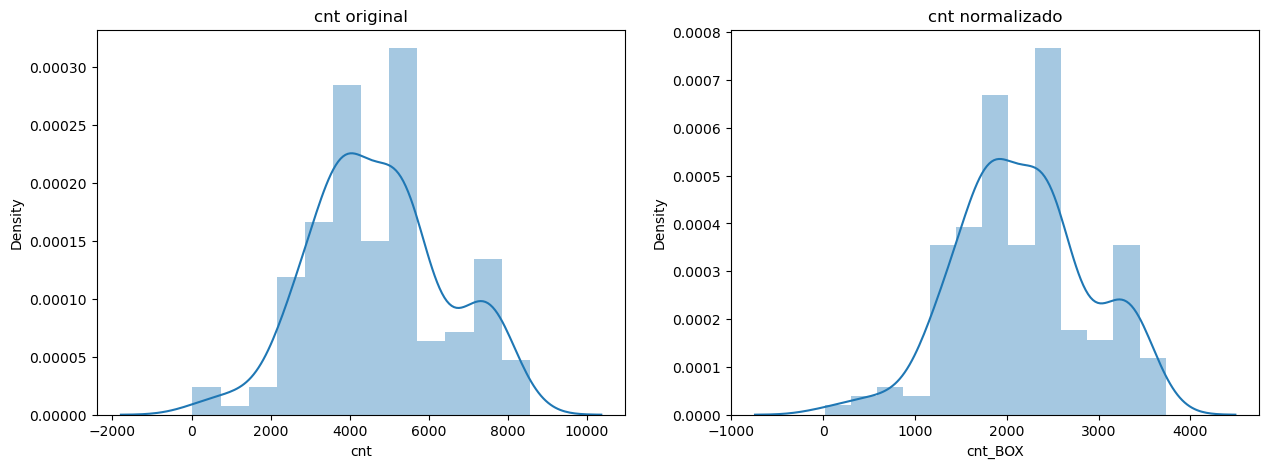

In [36]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('cnt original')
axes[1].set_title('cnt normalizado')

sns.distplot(otoño['cnt'] ,ax = axes[0])
sns.distplot(otoño["cnt_BOX"], ax = axes[1])
plt.show();

In [37]:
stats.shapiro(otoño["cnt_BOX"])

ShapiroResult(statistic=0.9824040532112122, pvalue=0.024072876200079918)

- Sklearn MinMaxScaller

In [38]:
minmax=MinMaxScaler()

In [39]:
minmax.fit(otoño[['cnt']])

MinMaxScaler()

In [40]:
X_normalizada=minmax.transform(otoño[['cnt']])

In [41]:
cnt_minmax=pd.DataFrame(X_normalizada,columns=['sklearn_cnt'])
cnt_minmax.head(2)

,sklearn_cnt
0,0.278097
1,0.632954


In [42]:
otoño['sklearn_cnt']=cnt_minmax

/tmp/ipykernel_1679/2601429743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otoño['sklearn_cnt']=cnt_minmax


In [43]:
otoño.head(2)

,instant,dteday,season,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt,cnt_NORM,cnt_LOG,cnt_RAIZ,cnt_BOX,sklearn_cnt
0,266,2018-09-23,autumn,0,0,7,2,26.10625,97.25,5.250569,2395,-0.273428,7.781139,48.938737,1191.154293,0.278097
1,267,2018-09-24,autumn,0,0,1,2,28.22060,86.25,5.251681,5423,0.081429,8.598404,73.641021,2479.141408,0.632954


/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/antoanela31/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


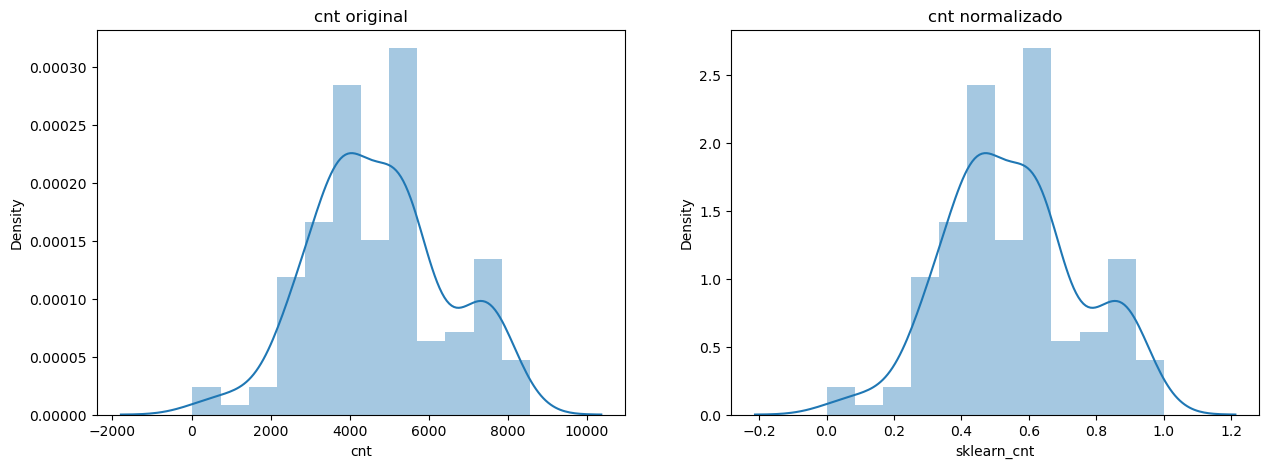

In [44]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('cnt original')
axes[1].set_title('cnt normalizado')

sns.distplot(otoño['cnt'] ,ax = axes[0])
sns.distplot(otoño["sklearn_cnt"], ax = axes[1])
plt.show();

In [45]:
stats.shapiro(otoño["sklearn_cnt"])

ShapiroResult(statistic=0.9814850687980652, pvalue=0.018196173012256622)

Estandarizacion

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

In [48]:

numericas.drop(['cnt'], axis = 1, inplace = True)

numericas.head(2)

,instant,yr,holiday,weekday,weathersit,atemp,hum,windspeed
0,1,0,1,1,2,18.18125,80.5833,10.749882
1,2,0,0,2,2,17.68695,69.6087,16.652113


In [49]:

scaler.fit(numericas)

StandardScaler()

In [50]:
# transformamos los datos

X_escaladas = scaler.transform(numericas)

In [51]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_estandar = pd.DataFrame(X_escaladas, columns = numericas.columns)
numericas_estandar.head(2)

,instant,yr,holiday,weekday,weathersit,atemp,hum,windspeed
0,-1.729680,-1.0,5.672902,-1.493944,1.112127,-0.680818,1.252343,-0.387833
1,-1.724934,-1.0,-0.176277,-0.994366,1.112127,-0.741507,0.480996,0.748899


In [52]:
for columna in numericas_estandar.columns:
    print(f'La media de la columna {columna} es:  {numericas_estandar[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {numericas_estandar[columna].std()}')
    print("-------------------------------------------------------------")

La media de la columna instant es:  1.9466924267400005e-17
La desviación estándar de la columna instant es: 1.0006856360078735
-------------------------------------------------------------
La media de la columna yr es:  0.0
La desviación estándar de la columna yr es: 1.0006856360078737
-------------------------------------------------------------
La media de la columna holiday es:  7.262075263815236e-17
La desviación estándar de la columna holiday es: 1.0006856360078786
-------------------------------------------------------------
La media de la columna weekday es:  -7.36853500590258e-17
La desviación estándar de la columna weekday es: 1.0006856360078744
-------------------------------------------------------------
La media de la columna weathersit es:  3.7443412145577195e-16
La desviación estándar de la columna weathersit es: 1.0006856360078786
-------------------------------------------------------------
La media de la columna atemp es:  1.3931017678858128e-16
La desviación estándar 

In [53]:
numericas_estandar.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,1.946692e-17,1.000686,-1.729680,-0.864840,0.000000,0.864840,1.729680
yr,730.0,0.000000e+00,1.000686,-1.000000,-1.000000,0.000000,1.000000,1.000000
holiday,730.0,7.262075e-17,1.000686,-0.176277,-0.176277,-0.176277,-0.176277,5.672902
weekday,730.0,-7.368535e-17,1.000686,-1.493944,-0.994366,0.004790,1.003947,1.503525
weathersit,730.0,3.744341e-16,1.000686,-0.724644,-0.724644,-0.724644,1.112127,2.948897
atemp,730.0,1.393102e-16,1.000686,-2.427687,-0.839391,0.078812,0.825007,2.249122
hum,730.0,-9.321311e-16,1.000686,-4.411436,-0.756628,-0.009852,0.718620,2.423758
windspeed,730.0,1.844035e-16,1.000686,-2.169254,-0.716828,-0.122931,0.551197,4.089995


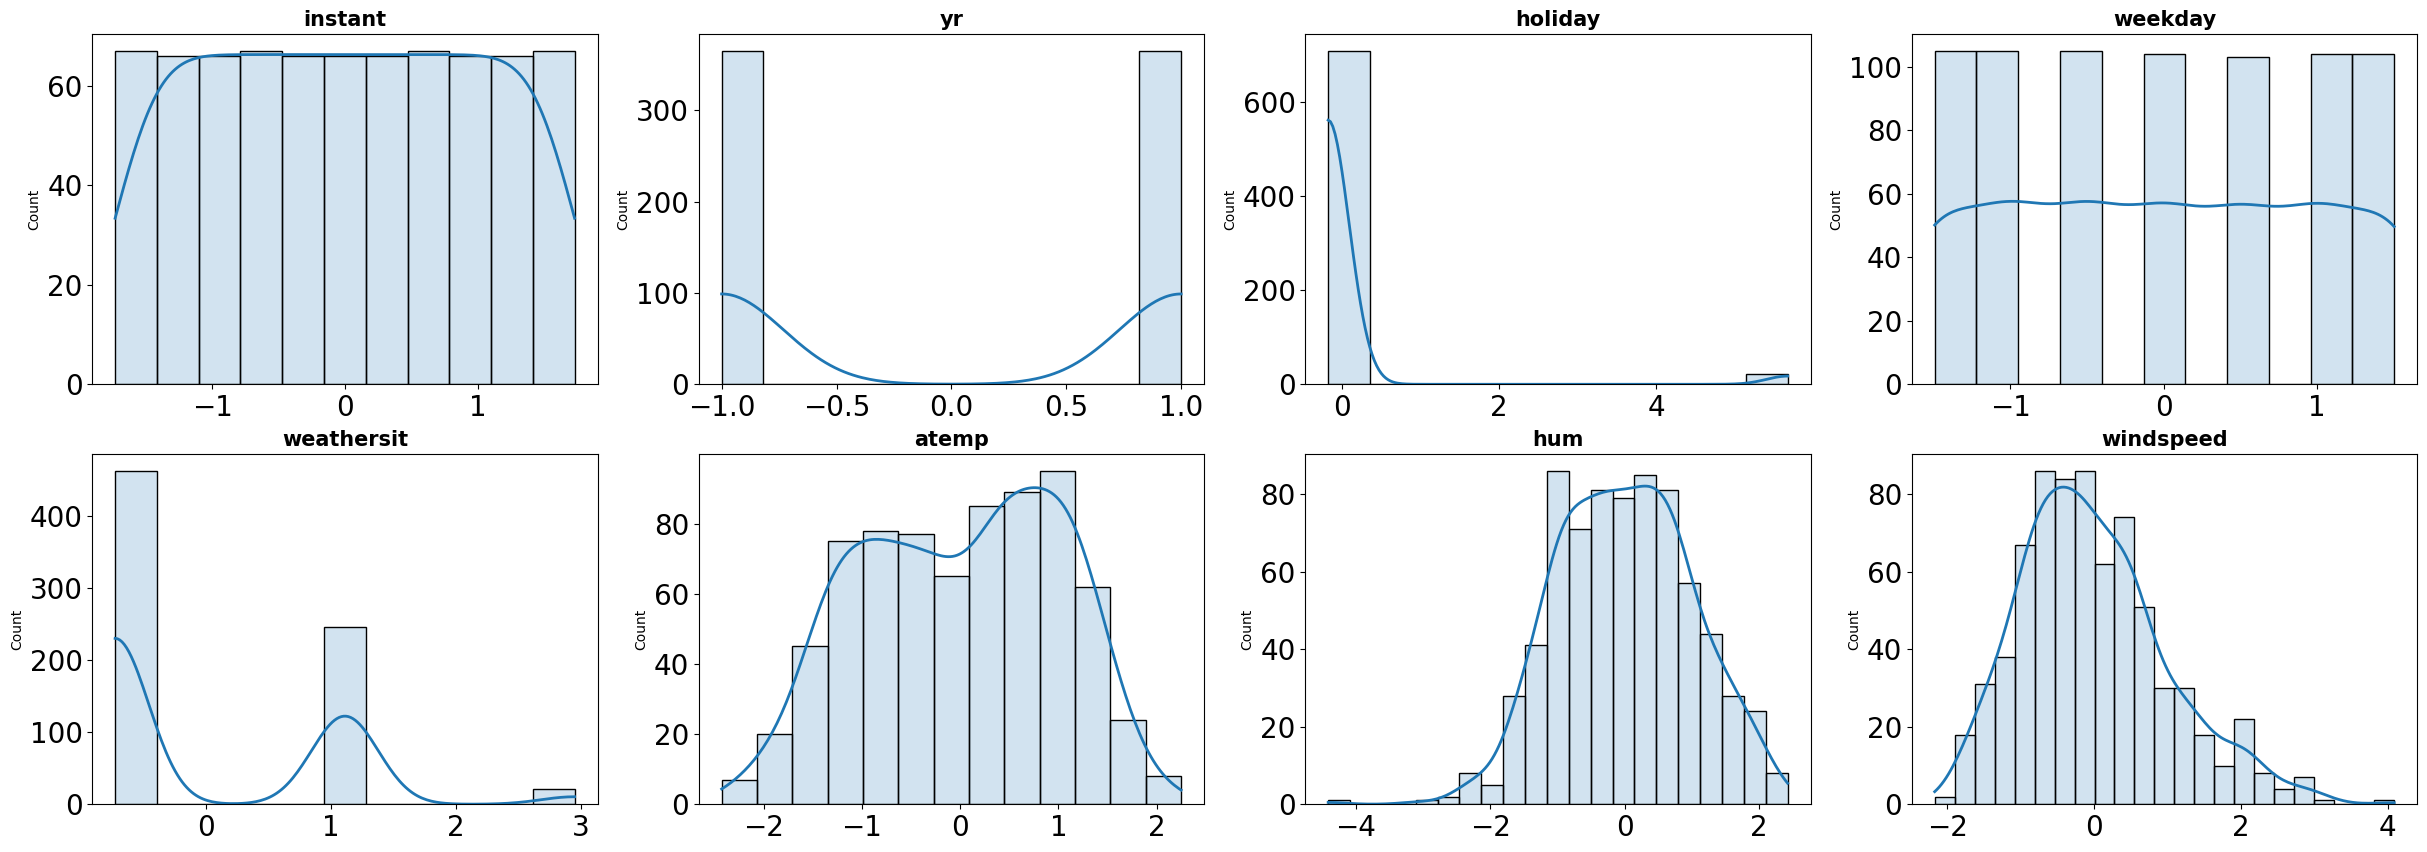

In [54]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (30, 10))

columnas_estandar = numericas_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = numericas_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
   


> Encoding

In [55]:
otoño['season'] = otoño['season'].map({'autumn':4})

/tmp/ipykernel_1679/2342837826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otoño['season'] = otoño['season'].map({'autumn':4})


In [56]:
otoño.season.unique()

array([4])

In [57]:
otoño.head()

,instant,dteday,season,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt,cnt_NORM,cnt_LOG,cnt_RAIZ,cnt_BOX,sklearn_cnt
0,266,2018-09-23,4,0,0,7,2,26.10625,97.2500,5.250569,2395,-0.273428,7.781139,48.938737,1191.154293,0.278097
1,267,2018-09-24,4,0,0,1,2,28.22060,86.2500,5.251681,5423,0.081429,8.598404,73.641021,2479.141408,0.632954
2,268,2018-09-25,4,0,0,2,2,28.63185,84.5000,3.375406,5010,0.033029,8.519191,70.781353,2309.154712,0.584554
3,269,2018-09-26,4,0,0,3,2,29.45210,84.8333,7.416900,4630,-0.011504,8.440312,68.044103,2151.462905,0.540021
4,270,2018-09-27,4,0,0,4,2,28.72625,88.5417,7.917457,4120,-0.071272,8.323608,64.187226,1937.679400,0.480253


In [58]:
otoño.drop(['cnt_NORM', 'cnt_LOG', 'cnt_RAIZ', 'cnt_BOX','sklearn_cnt','dteday'], axis=1, inplace=True)

/tmp/ipykernel_1679/2325970499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otoño.drop(['cnt_NORM', 'cnt_LOG', 'cnt_RAIZ', 'cnt_BOX','sklearn_cnt','dteday'], axis=1, inplace=True)


In [59]:
otoño.head()

,instant,season,yr,holiday,weekday,weathersit,atemp,hum,windspeed,cnt
0,266,4,0,0,7,2,26.10625,97.2500,5.250569,2395
1,267,4,0,0,1,2,28.22060,86.2500,5.251681,5423
2,268,4,0,0,2,2,28.63185,84.5000,3.375406,5010
3,269,4,0,0,3,2,29.45210,84.8333,7.416900,4630
4,270,4,0,0,4,2,28.72625,88.5417,7.917457,4120


DECISION TREE

In [60]:
# al igual que en la regresión lineal tenemos que separar nuestro dataframe en X e y

X = otoño.drop("cnt", axis = 1)
y = otoño["cnt"]

In [61]:
# y dividir nuestros datos en train y test para poder evaluar la bondad de nuestro modelo

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
# creamos el objeto del modelo, al igual que hacíamos en la regresión lineal
arbol = DecisionTreeRegressor(random_state =0)


In [63]:

# ajustamos el modelo, igual que en la regresión lienal. 
arbol.fit(x_train, y_train)


DecisionTreeRegressor(random_state=0)

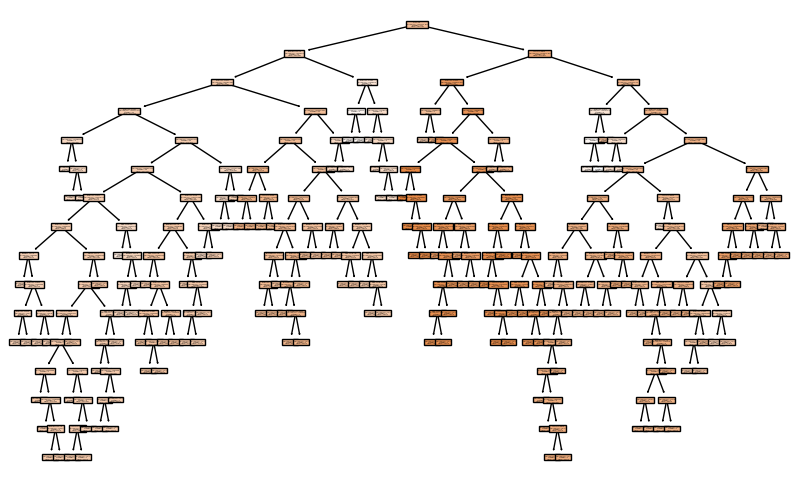

In [64]:
#Para mostrar el modelo en arbol
fig = plt.figure(figsize = (10,6))  
tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
plt.show();

In [65]:
# max features. Como vemos, debemos poner en nuestro modelo una profudidad máxima de 4. 

max_features = np.sqrt(len(x_train.columns))
max_features

3.0

In [66]:
# max depth compruebo
print(arbol.tree_.max_depth)

15


In [67]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train

y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [68]:
#Métricas
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [69]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1.head()

,MAE,MSE,RMSE,R2,set,modelo
0,607.333333,820203.555556,905.650902,0.643769,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


### MODELO II DECISION TREE PARA ESTABLECER LA PROFUNDIDAD DEL PROPIO MODELO

In [70]:
param = {"max_depth": [2,4, 6], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, 
                                #la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. 
                                #Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 

        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [71]:
# una vez creado el diccionario iniciaremos el modelo con GridSearch
gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [72]:
# ajustamos el modelo que acabamos de definir en el GridSearch

gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [73]:
# este método (BEST_ESTIMATOR) nos esta diciendo que el mejor modelo es aquel que tiene una profundidad de 6, que usa 4 
# variables predictoras para construir el modelo y que tiene  un min_samples_leaf y un min_samples_split de 10. 
mejor_modelo = gs.best_estimator_
mejor_modelo


DecisionTreeRegressor(max_depth=6, max_features=3, min_samples_leaf=10,
                      min_samples_split=10)

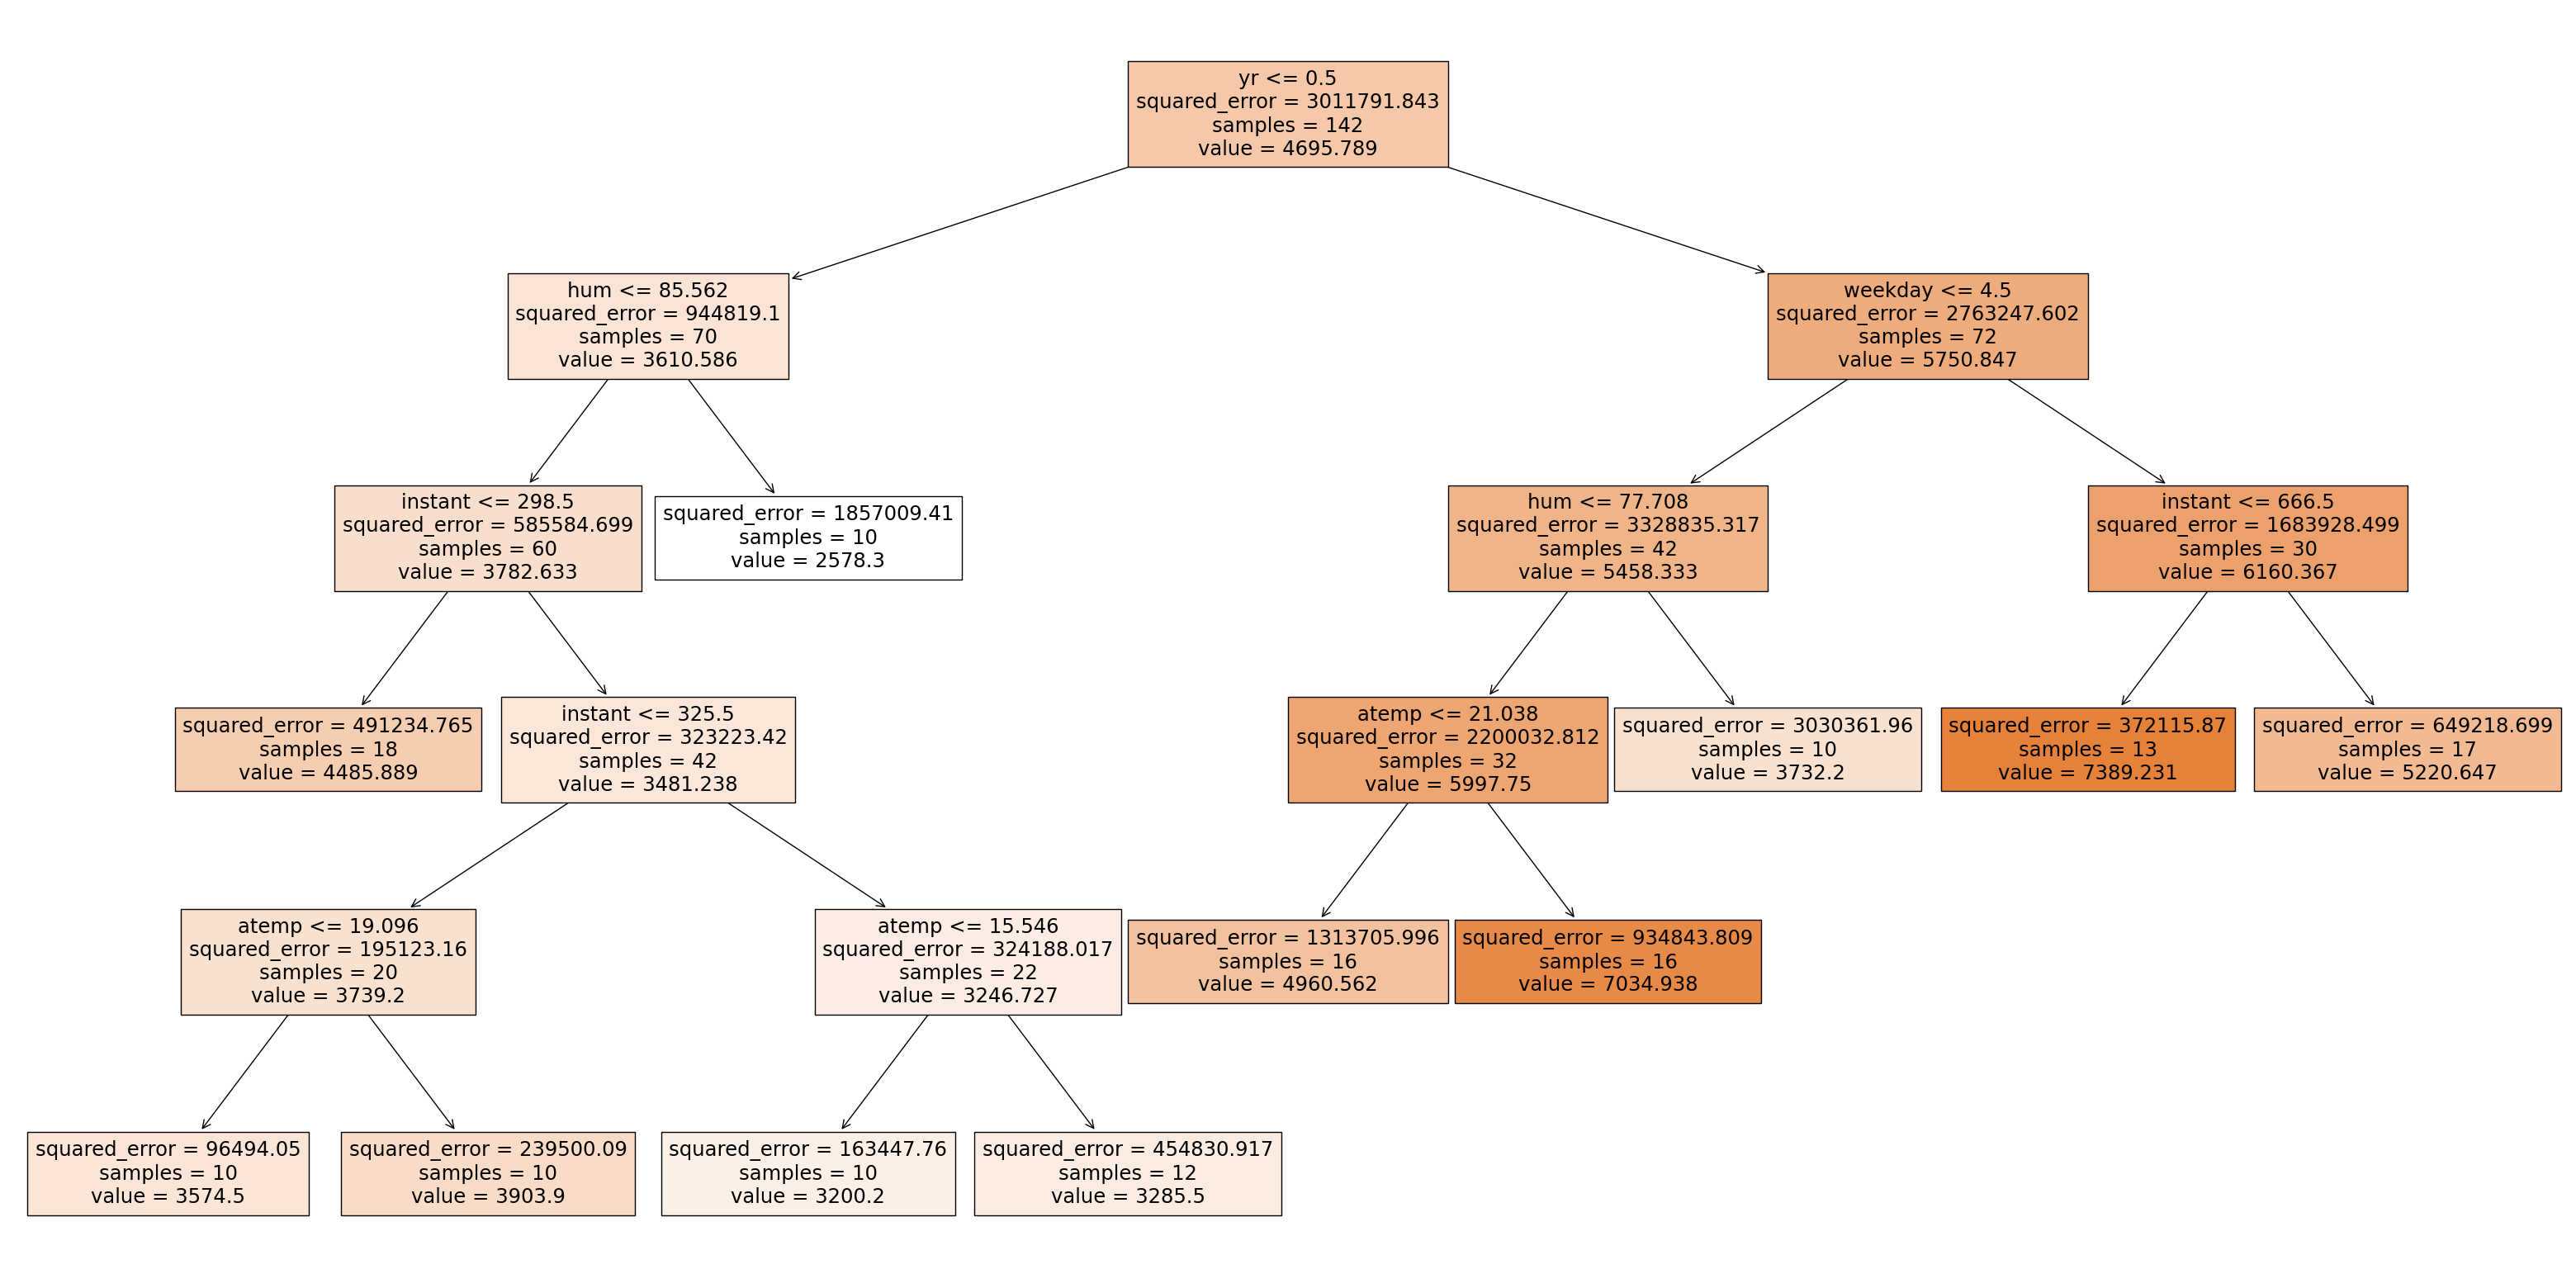

In [74]:
#veamos ahora que pinta tiene nuestro árbol

fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [75]:

#metricas para comprobar el modelo

y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)


dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,495.782790,476567.418902,690.338626,0.793017,test,Decision tree II
1,617.864205,845206.693964,919.351235,0.719367,train,Decision tree II


In [76]:
df_otoño_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_otoño_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,607.333333,820203.555556,905.650902,0.643769,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,495.782790,476567.418902,690.338626,0.793017,test,Decision tree II
1,617.864205,845206.693964,919.351235,0.719367,train,Decision tree II


In [77]:
df_otoño_decision_results.to_csv('bikes_DT_otoño.csv')

In [78]:
# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
2,yr,0.528460
7,hum,0.167521
0,instant,0.162201
6,atemp,0.113785
4,weekday,0.028034
1,season,0.000000
3,holiday,0.000000
5,weathersit,0.000000
8,windspeed,0.000000


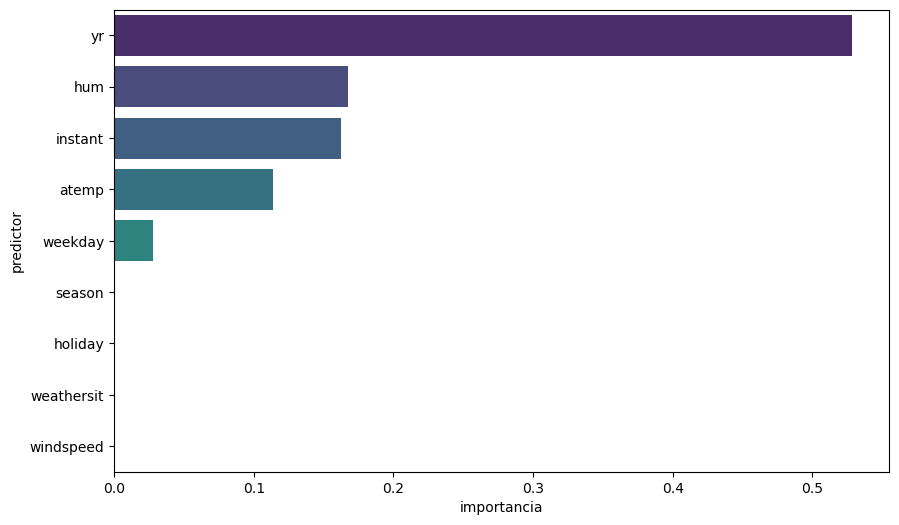

In [79]:

plt.figure(figsize=(10,6))
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

## Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

In [81]:
X = otoño.drop("cnt", axis = 1)
y = otoño["cnt"]

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
param = {"max_depth": [2,4, 6], # teniendo en cuenta que teníamos overfitting tendremos que reducir la profundidad del modelo, la nuestra anterior era de 17. Bajaremos mucho este valor ya que teníamos un overfitting muy claro
        "max_features": [1,2,3,4],# calculamos en celdas anteriores, probaremos a hacer el modelo como una variable, 2, 3 y 4. Ponemos como límite el 4 ya que es el resultado de la raiz cuadrada. 
        # estos dos hiperparámetros son más difíciles de definir, pero usualmente se suelen elegir los siguientes valores
        "min_samples_split": [10, 50, 100],
        "min_samples_leaf": [10,50,100]} 

In [84]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") # la métrica que queremos que nos devuelva

In [85]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [86]:
bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=6, max_features=4, min_samples_leaf=10,
                      min_samples_split=10)

In [87]:
# dibujemos los árboles de nuestro bosque


#for arbol in tqdm(bosque.estimators_):
    #fig = plt.figure(figsize=(40, 20))
    #tree.plot_tree(arbol, feature_names= x_train.columns, filled = True)
    #plt.show()

In [88]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [89]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [90]:
# sacamos las métricas para ver si hay overfitting o unerfitting, para modificar la profundidad en función de estos resultados

dt_otoño2_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
dt_otoño2_results

,MAE,MSE,RMSE,R2,set,modelo
0,546.949342,453670.692067,673.550809,0.802962,test,Random Forest
1,641.730431,899734.653785,948.543438,0.701263,train,Random Forest


In [91]:
# vamos a crearnos un dataframe, igual que hicimos en la clase anterior con la importancia de cada una de las variables incluidas en el modelo

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,instant,0.433001
2,yr,0.231433
6,atemp,0.215114
7,hum,0.068307
8,windspeed,0.024883
5,weathersit,0.014677
4,weekday,0.012585
1,season,0.000000
3,holiday,0.000000


In [92]:
dt_otoño2_results.to_csv('bikes_RF_otoño.csv')

In [93]:
resultados_totales= pd.concat([dt_otoño2_results, df_otoño_decision_results], axis = 0)


In [94]:
resultados_totales

,MAE,MSE,RMSE,R2,set,modelo
0,546.949342,453670.692067,673.550809,0.802962,test,Random Forest
1,641.730431,899734.653785,948.543438,0.701263,train,Random Forest
0,607.333333,820203.555556,905.650902,0.643769,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,495.782790,476567.418902,690.338626,0.793017,test,Decision tree II
1,617.864205,845206.693964,919.351235,0.719367,train,Decision tree II


El mejor resultado es decision tree I

In [95]:

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )



importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)


print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,instant,0.433001
2,yr,0.231433
6,atemp,0.215114
7,hum,0.068307
8,windspeed,0.024883
5,weathersit,0.014677
4,weekday,0.012585
1,season,0.000000
3,holiday,0.000000
